# **TikTok Project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

You are a data professional at TikTok. 

* The data team is **working towards building a machine learning model that can be used to determine whether a video `contains a claim` or whether it `offers an opinion`**. 

With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead, Maika Abadi, is interested in how different variables are associated with whether a user is verified. 

* Earlier, **the data team observed that if a user is verified**, `they are much more likely to post opinions`. 

Now, the data team has decided to explore -**how to predict verified status** to help them understand how video characteristics relate to verified users. Therefore, you have been asked to conduct a `logistic regression` using `verified status` as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

### **Course 5 End-of-course project: Regression modeling**


In this activity, you will build a logistic regression model in Python. As you have learned, logistic regression helps you estimate the probability of an outcome. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed.

<br/>

**The purpose** of this project is to demostrate knowledge of EDA and regression models.

**The goal** is to build a logistic regression model and evaluate the model.
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

Follow the instructions and answer the question below to complete the activity. Then, you will complete an executive summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.


## **Build a regression model**
### **PACE stages**

Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

#### **PACE: Plan**
Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

##### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load dataset into dataframe
data = pd.read_csv(r"C:\Users\danie\OneDrive\Desktop\03. Data Study\00.Advanced Analytics\5. Regressions\Files\tiktok_dataset.csv")

#### **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a logistic regression model?

##### **Data Dictionary**
![Ok](Data_dictionary.png)

##### **Task 2a. Explore data with EDA**

Analyze the data and check for:
* Dataset size
* Datatypes in the correct form
* missing values
* duplicates


In [3]:
data.head(5) 
# data.shape : (19382, 12)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


##### Handling missing values

In [5]:
#Check how many null values in columns
null_df = data.isnull().sum().reset_index()
null_df.sort_values(by=0, ascending=False)

,index,0
1,claim_status,298
4,video_transcription_text,298
7,video_view_count,298
8,video_like_count,298
9,video_share_count,298
10,video_download_count,298
11,video_comment_count,298
0,#,0
2,video_id,0
3,video_duration_sec,0


In [6]:
#Check how many rows in total have null values
null_df = data[data.isnull().any(axis=1)]

#Total Null row percentage of the dataframe
null_percentage = round((null_df.shape[0]/data.shape[0])*100,3) 

print('The total size of the dataframe with null values is : ', null_df.shape)
print('That is equal to ', null_percentage , ' % of the total values')


The total size of the dataframe with null values is :  (298, 12)
That is equal to  1.538  % of the total values


In [7]:
# Since its a small portion of all data , We will procede to drop null values to prepare our model
data = data.dropna()

#All must be zero.
null_df = data.isnull().sum().reset_index()
null_df.sort_values(by=0, ascending=False)

,index,0
0,#,0
1,claim_status,0
2,video_id,0
3,video_duration_sec,0
4,video_transcription_text,0
5,verified_status,0
6,author_ban_status,0
7,video_view_count,0
8,video_like_count,0
9,video_share_count,0


##### Check for duplicates

In [8]:
#Check
duplicated_df = data[data.duplicated()]
duplicated_df # No duplicated rows

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count


##### Summary statistics seen through categorical data

##### Check for Outliers
Boxplot to understand the distribution and outliers

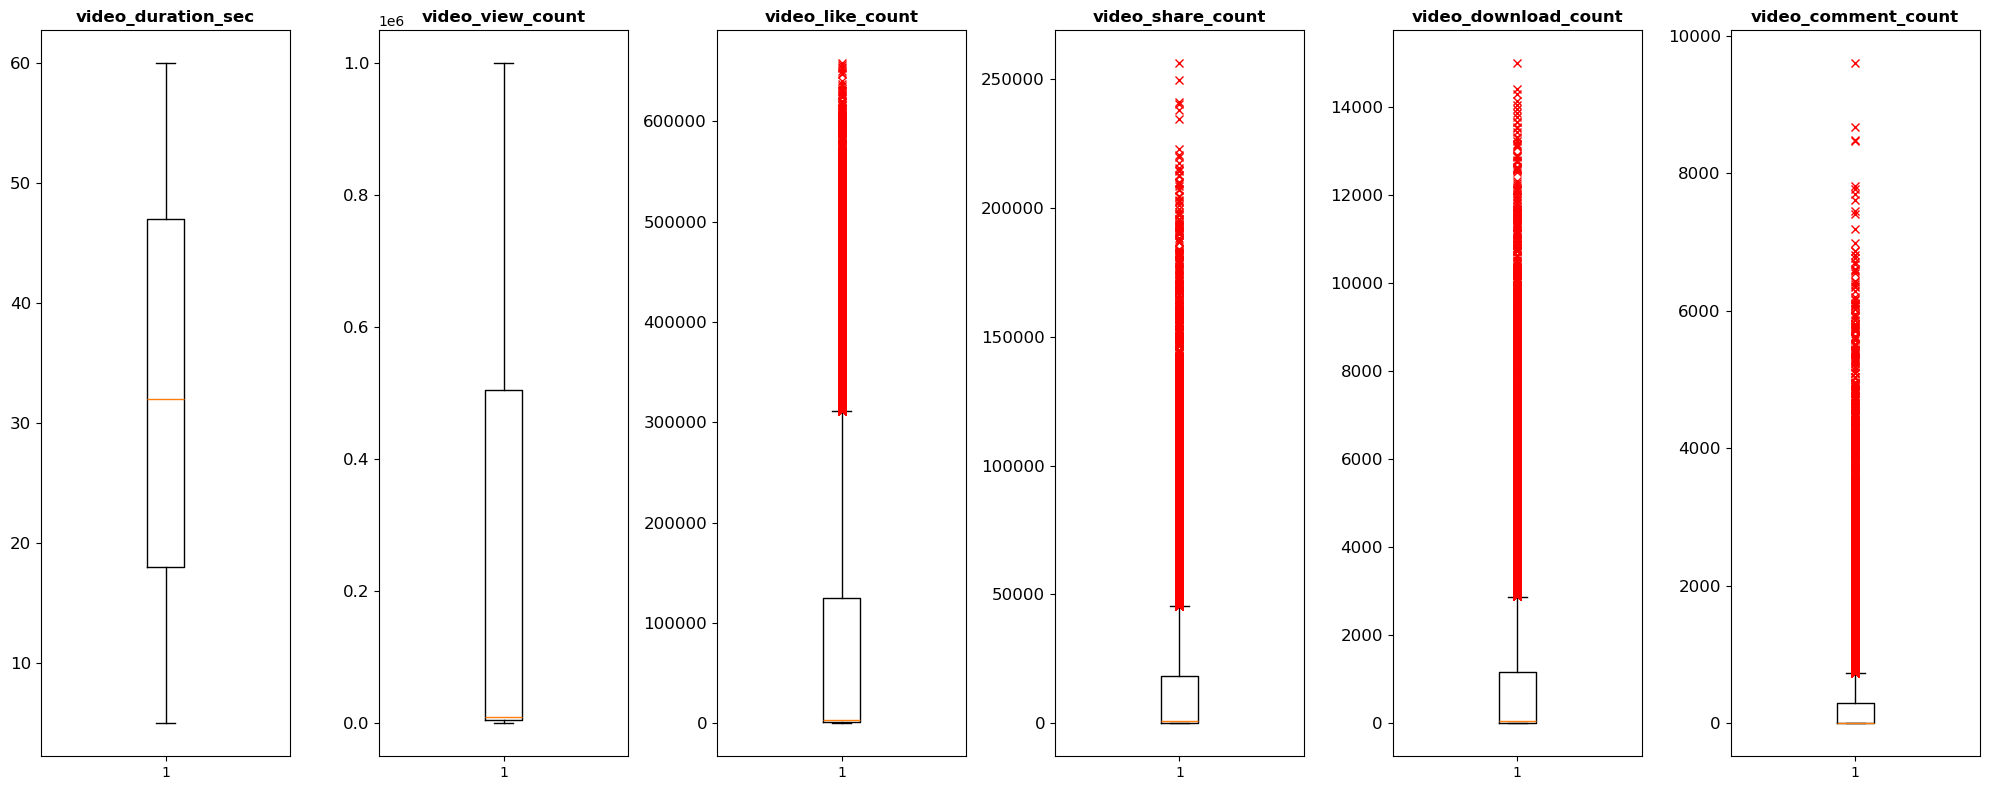

In [9]:
#Lets define a dataframe with only the columns needed to visualize my consolidated boxplots.
df_box = data[['video_duration_sec','video_view_count','video_like_count','video_share_count','video_download_count','video_comment_count']]

#Now lets do set up for the markers
marks = dict(markerfacecolor='white',marker='x',markeredgecolor='red')
fig, axs=plt.subplots(1,len(df_box.columns),figsize=(20,8))

# Iteration for each column 
for i , ax in enumerate(axs.flat):
    bp = ax.boxplot(df_box.iloc[:,i], flierprops=marks)
    ax.set_title(df_box.columns[i], fontsize=12, fontweight='bold')
    ax.tick_params(axis='y', labelsize=12)

plt.tight_layout()


##### Observation : Outliers
For video metrics : `Like` , `share`, `download` and `comments` have many outiers, this could be an important consideration when we start the build phase for the model.
Consider that these outliers can be detrimental to our model so we will remove them.

#### Deal with outliers
The definition we take of an outlier is as follows :
$$ Outlier(Threshold) =  Median + (1.5 * IQR) $$

Where : 

$$IQR  =  ( Q3 - Q1 )$$

In [10]:
#Identify the columns that have outliers , see boxplot above, RED 'X' markings outside boxplots.
has_outliers = ['video_like_count','video_share_count','video_download_count','video_comment_count']

B_filter = True # Set a variable to call it later as a column

#Stablish for cycle for i number of elements in list "has outliers"
for i in has_outliers : 

#Step1. Calculate IQR , and median for each i element
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1
    Median = data[i].median()

#Step 2. Define upper boundary ( Lower boundary is just 0 and there is no negative outlier. )
    outlier_threshold = Median + (1.5 * IQR )

#Step 3. Create helper column to map True or False if threshold or not , use your variable.
    col_filter = (data[i] <= outlier_threshold )

#Step 4. Merge column filter with B_Filter
    B_filter = B_filter & col_filter

df_filtered = data[B_filter]
df_filtered.describe().round(1)
df_filtered.shape


(13468, 12)

Check `class balance` of the `target variable`. Remember, the goal is to predict whether the user of a given post is verified or unverified.

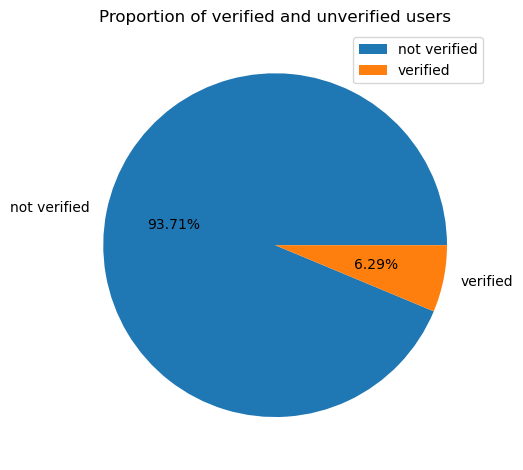

In [11]:

verified = data.groupby('verified_status')['#'].count().reset_index()
verified

#Create piechart
plt.pie(data=verified, x=verified['#'], labels=verified['verified_status'],autopct='%.2f%%')
plt.title('Proportion of verified and unverified users')
plt.legend().set_alignment('right')
plt.tight_layout()

In [12]:
data.verified_status.value_counts(normalize=True).reset_index()

,verified_status,proportion
0,not verified,0.93712
1,verified,0.06288


Approximately 93.7% of the dataset represents videos posted by unverified accounts and 6.3% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [13]:
# Use resampling to create class balance in the outcome variable, if needed

# Step 1. Identify data points from majority and minority classes , build dataframes for each
majority_class = data[data['verified_status'] == 'not verified' ]
minority_class = data[data['verified_status'] == 'verified' ]

# Step 2. Upsample the minority class (which is "verified")
from sklearn.utils import resample  # First, Import resample from sklearn.utils

# Second, using resample create a new Dataframe  
minority_class_upsample = resample(minority_class,
                                   replace=True,
                                   n_samples=len(majority_class),
                                   random_state=0)


# Step 3. Combine majority class with upsampled minority class
balanced_sample_df = pd.concat(objs=[minority_class_upsample,majority_class]).reset_index(drop=True)

# Display new class counts , check if data is the same size.
balanced_sample_df['verified_status'].value_counts().reset_index() # It must show the verified and not verified are in same quantity



,verified_status,count
0,verified,17884
1,not verified,17884


Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.

In [14]:
# Step 1 . Create a column that contains the amount of characters in the video_transcription text
balanced_sample_df['text_length'] = balanced_sample_df['video_transcription_text'].str.len()

#Step 2. Get the average lenght of video_transcription_text , by verified status
balanced_sample_df.groupby('verified_status')['text_length'].mean().reset_index().round()

,verified_status,text_length
0,not verified,89.0
1,verified,85.0


Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

Text(0.5, 1.0, 'Distribution of transcription_text length for videos posted by verified status')

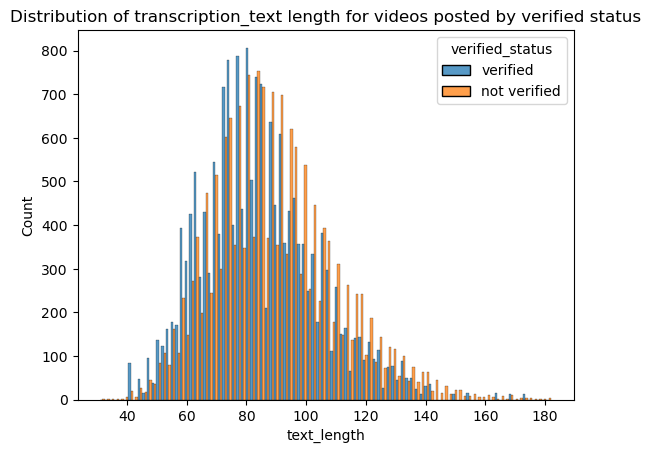

In [15]:
hist = sns.histplot(data=balanced_sample_df , stat='count', multiple='dodge', x='text_length',hue='verified_status')
plt.title("Distribution of transcription_text length for videos posted by verified status")


### **Task 2b. Examine correlations**
Next, code a correlation matrix to help determine most correlated variables.

In [16]:
balanced_sample_df.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.581483,-0.504015,-0.487096,-0.413799,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.006507,0.010515,0.008753,0.013983,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004890,0.002206,0.003989,-0.004586,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.832832,0.711313,0.690048,0.583485,0.244693
video_like_count,-0.581483,0.006507,0.004890,0.832832,1.000000,0.850053,0.828082,0.706140,0.202386
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.850053,1.000000,0.710117,0.620182,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.828082,0.710117,1.000000,0.857679,0.173396
video_comment_count,-0.413799,0.013983,-0.004586,0.583485,0.706140,0.620182,0.857679,1.000000,0.149750
text_length,-0.193677,-0.007083,-0.002981,0.244693,0.202386,0.171651,0.173396,0.149750,1.000000


##### Create a heatmap - Correlation of variables

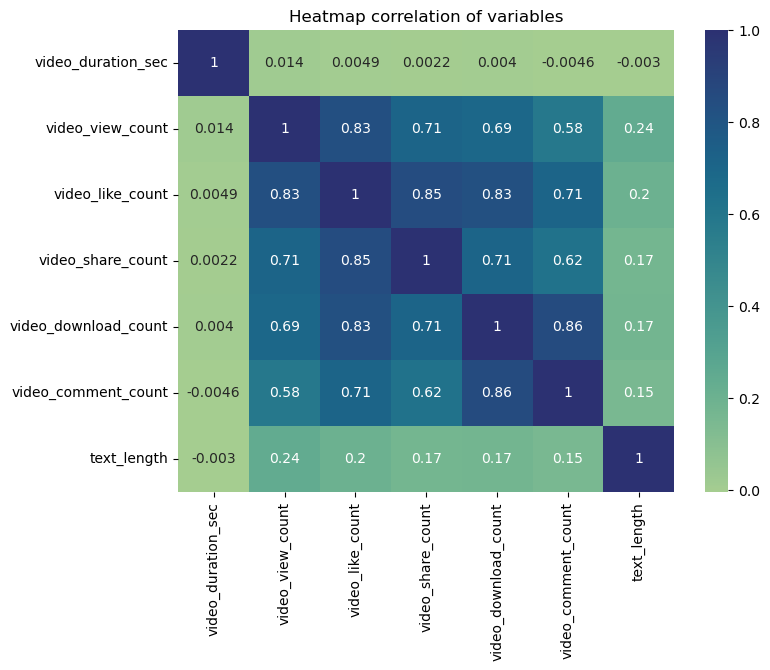

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(balanced_sample_df[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]].corr(numeric_only=True),
            annot=True,
            cmap='crest')
plt.title('Heatmap correlation of variables')
plt.show()


One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Response:** 

The above heatmap shows that there are strongly correlated variables  ( r > 0.75) .
*  `comment count` and `download count` having correlation of **r = 0.86** 
*  `like count` with both `Share` and `view` counts,  correlation of  **r > 0.8**

The features we will be removing are : `video_download_count` , `video_like_count`

* By eliminating this, our correlation matrix , heatmap shows no correlation greather **r = 0.71**

The features we will be utilizing are : **video** `view` , `share` , `comment` **counts**



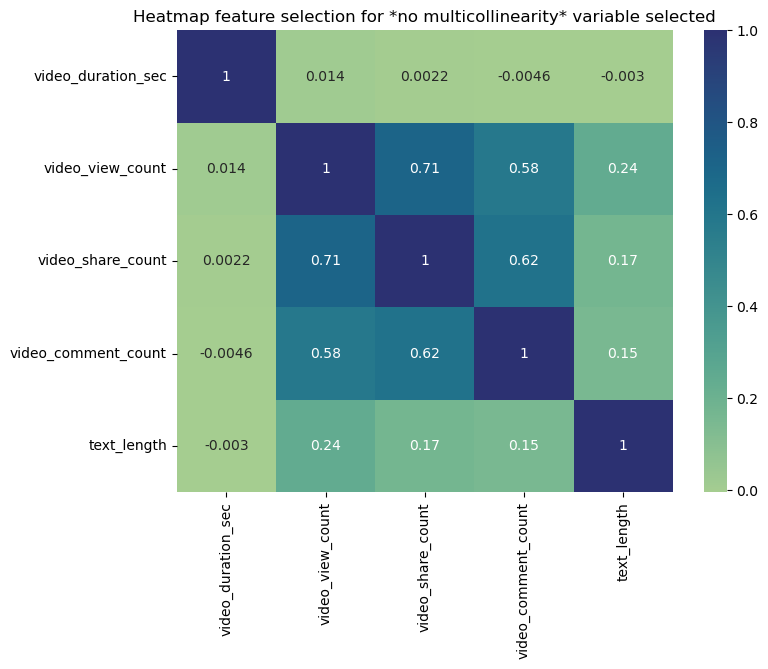

In [18]:
# Feature Selection -  Selected for No Multicollinearity

plt.figure(figsize=(8,6))
sns.heatmap(balanced_sample_df[["video_duration_sec", "video_view_count", 
                     "video_share_count", "video_comment_count", "text_length"]].corr(numeric_only=True),
            annot=True,
            cmap='crest')
plt.title('Heatmap feature selection for *no multicollinearity* variable selected')
plt.show()

## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3a. Select variables**
Select the outcome variable.

*  As we already stablished our outcome variable is the main question we want to adress, we want to predict *claim status* by virtue of predicting `verified_status` so this ought to be our outcome variable.

Set your $Y$ and $X$ variables.

In [19]:
#Set your Outcome variable Y
Y = balanced_sample_df['verified_status']

# Feature selection ( X Independent variables )
X= balanced_sample_df[['claim_status','author_ban_status','video_duration_sec',
                       'video_view_count', 'video_share_count', 'video_comment_count', 'text_length']]

In [20]:
X.head(5)

,claim_status,author_ban_status,video_duration_sec,video_view_count,video_share_count,video_comment_count,text_length
0,opinion,active,58,154.0,2.0,0.0,71
1,opinion,active,29,9565.0,593.0,2.0,78
2,opinion,active,25,9351.0,62.0,2.0,81
3,opinion,active,24,7361.0,207.0,0.0,86
4,opinion,active,17,1528.0,20.0,0.0,96


**Note that :** We do not select `#` since its a number assigned by tiktok ( check the data dictionary ) , and same principle applies to the `video_id` these data points exist for unique identification purposes instead of a mapping characteristic of content.

### Task 3b. **Train-test** split
Split the data into training and testing sets.

In [21]:
#Import train test module
from sklearn.model_selection import train_test_split


In [22]:
# Split the data into training and testing sets  
## var_train , var_test  = tts()
X_train , X_test , Y_train , Y_test = train_test_split(X,Y, test_size=0.30,random_state=0) # X,Y, test size = 30% , random= 0 state

#Confirm that the dimensions of the training and testing sets are in alignment.
X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((25037, 7), (10731, 7), (25037,), (10731,))

**Interpretation for test training and test sizes :**

* Row Size (observations) for both `training` sets ($X$ and $Y$) is equals to **25,037**
* Row Size (observations) for both `test` sets ($X$ and $Y$) is equals to **10,731**

* Columns ( **7** ) = Represent the features selected for this prediction model. (`claim_status`,`author_ban_status`,`video_duration` ... )

### **Task 3c. Encode variables**

##### Encode the **Categorical variables** $X$ **TRAIN** data

In [23]:
X_test.dtypes

claim_status            object
author_ban_status       object
video_duration_sec       int64
video_view_count       float64
video_share_count      float64
video_comment_count    float64
text_length              int64
dtype: object

 Get unique values in `claim_status` and `author_ban_status` ( Categorical variables)


In [24]:
#Unique
X_train["claim_status"].unique() , X_test['author_ban_status'].unique()



(array(['opinion', 'claim'], dtype=object),
 array(['active', 'banned', 'under review'], dtype=object))

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric.

*  One way to do this is through **one-hot encoding**.

**TASK :** `Encode categorical features` in the training set using an appropriate method.

##### One-Hot-Encoding  : **Understanding how to perform and integrate to model**

1. Import from sklearn.preprocessing the OneHotEncoder module
2. Create a dataframe to hold the Encoding transformation
3. Apply the .fit_transform( **df** [ `categorical_var` ] ), this will unpivot the categories, creating binary encoding of each variable.
4. **Join your original dataframe** to the new unpivoted categories , drop the categorical variable since it is now represented by the dataframe
5. Check result ( shape, unique, etc..)

In [25]:
#Step 1. Imports from sklearn.preprocessing - OneHotEncoder transformation.

from sklearn.preprocessing import OneHotEncoder

In [26]:
# Step 2. Create a dataframe to hold the Encoding transformatio

#2.1 Select our cateorical data to encode
categorical_variables = X_train[['claim_status','author_ban_status']]

categorical_variables.head() # Check your data. ( All ok )

#2.2 Apply the OneHotEconder , setting the output to be a dataframe.
encoding_process = OneHotEncoder(handle_unknown='ignore',               # Ignore handling unknown categories during transformation
                                 sparse_output=False ,                  # Sparse output 
                                 ).set_output(transform='pandas')       #Output will be a dataframe for pandas



In [27]:
#Step3. Apply the  .fit_transform( df [ `categorical_var` ] ) 
df_encoded = encoding_process.fit_transform(categorical_variables) 

df_encoded.head()     # Check data


,claim_status_claim,claim_status_opinion,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
32925,0.0,1.0,1.0,0.0,0.0
4266,0.0,1.0,1.0,0.0,0.0
24979,1.0,0.0,1.0,0.0,0.0
24074,1.0,0.0,1.0,0.0,0.0
32056,0.0,1.0,1.0,0.0,0.0


In [28]:
#Step 4. Join data frames X_train and encoded df , drop the categorical variables
X_train_final = pd.concat([X_train,df_encoded],axis=1).drop(columns=['claim_status','author_ban_status'])
X_train_final.shape  #(25037, 10) ok
X_train_final.head(3)

,video_duration_sec,video_view_count,video_share_count,video_comment_count,text_length,claim_status_claim,claim_status_opinion,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
32925,39,2016.0,64.0,0.0,84,0.0,1.0,1.0,0.0,0.0
4266,16,2270.0,351.0,5.0,112,0.0,1.0,1.0,0.0,0.0
24979,17,308728.0,38615.0,183.0,108,1.0,0.0,1.0,0.0,0.0


##### Encode $Y$ - For **TRAIN data**


In [29]:
#Check the data type of the outcome variable.
Y_train.dtype

dtype('O')

In [30]:
#Get the Unique values of the outcome variable
Y_train.unique()

array(['not verified', 'verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. 
* **Remember :** One-hot encoding can be used to make this `variable numeric`.

    *  Since we already performed the transformation for $X$ in a breakdown step-by-step manner, we will do this in a summarized way.

In [31]:
#Summarized encoding

#apply ohe function
encoding_y = OneHotEncoder(drop='first',
                           handle_unknown='ignore',
                           sparse_output=False)

#NOTE : KEY diference between encoding for X and Y ,  our encoding for Y will end as a flatenned binary array , this is different from X that ended up as a dataframe.
# Apply fit.transform () , use reshape, and ravel to flatten DF.
Y_train_final = encoding_y.fit_transform(Y_train.values.reshape(-1,1)).ravel()      # Variable ends up as an array [0 , 1 ] , and its not pivoted to generate a dataframe like in X.
Y_train_final


array([0., 1., 0., ..., 0., 0., 1.])

### **Task 3d. Model building**
Construct a model and fit it to the training set.

In [32]:
#Import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [33]:
#Construct a logsitic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=0 , max_iter=1000).fit(X_train_final, Y_train_final)

## **PACE: Execute**

Consider the questions in the your PACE Strategy Document to reflect on the Execute stage.

### **Task 4a. Results and evaluation**

* Evaluate your model.

#### Encode $X$ Categorical variables - for **TEST data**
Encode categorical features in the testing set using an appropriate method.

In [34]:
# ENCODING FOR X_test data  , same process as  X_train data.

#1. Select the testing features that need to be encoded
X_test_to_encode = X_test[['claim_status','author_ban_status']]

#2. Run the ohe (We already ran ohe for X_data, called "encoding_process")

#3. ( Since we already transformed the X variable for Train data, we can run the .fit_transform() function using the previous ohe )
df_encoded_x_test = encoding_process.fit_transform(X_test_to_encode)        #  'encoding_process' is the ohe already created for encoding the X_train data.
df_encoded_x_test.head(3)

#4. Concatenate the new encoded_X with the test_X data
X_test_final = pd.concat([X_test,df_encoded_x_test],axis=1).drop(columns=['claim_status','author_ban_status'])
X_test_final.head(3)

,video_duration_sec,video_view_count,video_share_count,video_comment_count,text_length,claim_status_claim,claim_status_opinion,author_ban_status_active,author_ban_status_banned,author_ban_status_under review
21061,35,201293.0,22845.0,943.0,98,1.0,0.0,1.0,0.0,0.0
31748,6,9046.0,397.0,2.0,58,0.0,1.0,1.0,0.0,0.0
20197,56,986459.0,87446.0,5295.0,118,1.0,0.0,0.0,1.0,0.0


#### **Test** the logistic regression model. 
* Use the model to make predictions on the encoded testing set.

In [35]:
#Use the logistic regression model to get predictions on the encoded testing set.
y_pred = log_clf.predict(X_test_final)

#Display the prediction
y_pred

#Display true labels of the testing set
Y_test.reset_index().head(3)

,index,verified_status
0,21061,not verified
1,31748,not verified
2,20197,not verified


##### Encode $Y$ - For **TEST data**


In [36]:
#Summarized encoding

#apply ohe function (We already encoded Y )


#NOTE : KEY diference between encoding for X and Y ,  our encoding for Y will end as a flatenned binary array , this is different from X that ended up as a dataframe.
# Apply fit.transform () , use reshape, and ravel to flatten DF.
Y_test_final = encoding_y.fit_transform(Y_test.values.reshape(-1,1)).ravel()      # Variable ends up as an array [0 , 1 ] , and its not pivoted to generate a dataframe like in X.
Y_test_final

array([0., 0., 0., ..., 1., 0., 0.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [37]:
X_train_final.shape , Y_train_final.shape , X_test_final.shape , Y_test_final.shape

((25037, 10), (25037,), (10731, 10), (10731,))

**NOTE :** Seems that all training and test data for both $X$ and $Y$ were encoded correctly, as seem through the data shape and data previews.

### **Task 4b. Visualize model results**
Create a confusion matrix to visualize the results of the logistic regression model.

In [38]:
from sklearn.metrics import confusion_matrix , ConfusionMatrixDisplay

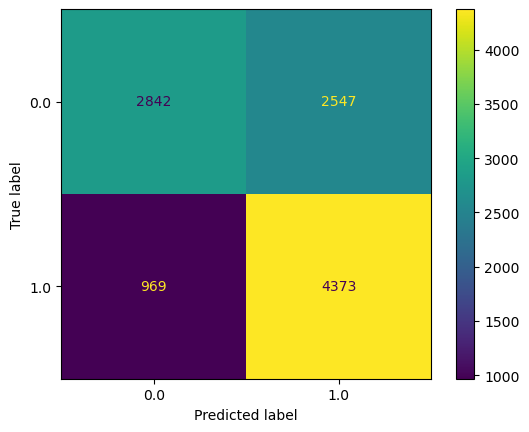

In [39]:
#Compute values for confusion matrix
log_cm = confusion_matrix(Y_test_final, y_pred, labels=log_clf.classes_)

#Create display elements
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_ )

#Plot the Confusion matrix
log_disp.plot()

#Display plot
plt.show()

### **Interpretation of confusion matrix :**

##### Upper Left Quadrant 
* This quadrant represents the number of `true negatives`

the number of videos posted by unverified accounts that the model accurately classified as so.

##### Upper Right Quadrant 
* This quadrant represents the number of `false positives`

the number of videos posted by unverified accounts that the model misclassified as posted by verified accounts.

##### Lower Left Quadrant 
* This quadrant represents the number of `false negatives`

the number of videos posted by verified accounts that the model misclassified as posted by unverified accounts.

##### Lower Right Quadrant 
* This quadrant represents the number of `true positives`

the number of videos posted by verified accounts that the model accurately classified as so.

*A perfect model would yield all true negatives and true positives, and no false negatives or false positives.*

##### Create a **classification report**
Must include: 

* precision
* recall
* f1-score

Also `Accuracy metrics` to **evaluate the performance** of the logistic regression model.

In [40]:
#Import classification report
from sklearn.metrics import classification_report , accuracy_score

In [41]:
#Create classification report
target_labels = ['verified','not verified']

print(classification_report(Y_test_final,y_pred , target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.75      0.53      0.62      5389
not verified       0.63      0.82      0.71      5342

    accuracy                           0.67     10731
   macro avg       0.69      0.67      0.67     10731
weighted avg       0.69      0.67      0.67     10731



#### Classification Report summary :

The classification report above shows that the `logistic regression model` achieved:

* `precision` of **63%** 
* `recall` of **82%**
* `accuracy` of **67%**. 

#####
Note that the precision and recall scores are taken from the `not verified` row of the output because that is the target class that we are most interested in predicting.
 
The `verified` class has its own **precision/recall metrics**, and the weighted average represents the combined metrics for both classes of the target variable.

### **Task 4c. Interpret model coefficients**


In [49]:
# Place into a DataFrame for readability

pd.DataFrame(data={'Feature Name':log_clf.feature_names_in_,'Model Coefficient':log_clf.coef_[0]}).round(5)

,Feature Name,Model Coefficient
0,video_duration_sec,-0.00307
1,video_view_count,-0.00000
2,video_share_count,0.00000
3,video_comment_count,0.00005
4,text_length,-0.00124
5,claim_status_claim,-0.84987
6,claim_status_opinion,0.75775
7,author_ban_status_active,0.11052
8,author_ban_status_banned,-0.13606
9,author_ban_status_under review,-0.06658


* Based on the logistic regression model, each additional second of the video is associated with 0.003 increases in the log-odds of the user having a not verified status.

#### Bonus Section :
* Explore model ROC Curve


In [47]:
from sklearn import metrics

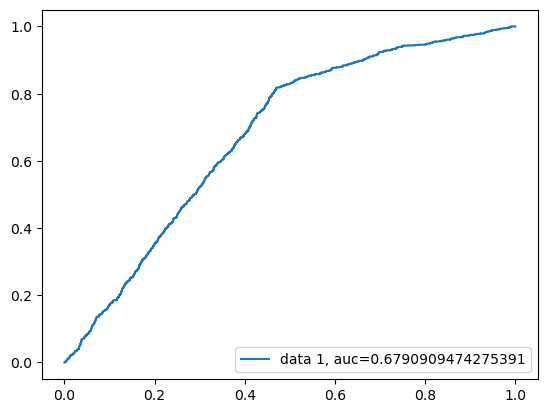

In [48]:
y_pred_proba = log_clf.predict_proba(X_test_final)[::,1]

fpr , tpr , _ = metrics.roc_curve(Y_test_final, y_pred_proba)

auc = metrics.roc_auc_score(Y_test_final , y_pred_proba ) 

plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

*AUC score for the case is **0.68**. AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.*

### **Task 4d. Conclusion**

1. What are the key takeaways from this project?

2. What results can be presented from this project?

##### Response :

1. What can we take away from this project?  
* Aside from the model capacities, one important take away is the flexibility of the process to quickly change the model and try-out different configurations , perhaps adding more metrics to our $X$ variables, or by furthering the model capacity through optimization.

...

2. What results can be presented from this project

 * The model performs better at `recall` ( Identifying correctly the verified status ) with **82%**
    * `Recall` is the capability of the model to find all positive observations. 

..

 * The `Precision` isn't great with **63%**, there is a big oportunity to optimize for this.
    * The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

..

*  The Model `Accuracy` isn't great either, Achiving **67%** 
    * ( Meaning it correctly categorized **67%** Actual `Verified` and `Not verified` correctly)
